In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
dataset1 = pd.read_csv("FIFA_2018_Predict.csv")

In [6]:
dataset1

,Date,Team,Opponent,Goal_Scored,Ball Possession %,Attempts,On_Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14/06/2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14/06/2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15/06/2018,Egypt,Uruguay,0,43,8,0,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15/06/2018,Uruguay,Egypt,1,57,14,0,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15/06/2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11/07/2018,England,Croatia,0,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14/07/2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14/07/2018,England,Belgium,0,57,15,0,7,3,5,...,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15/07/2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [7]:
print(dataset1.columns)

Index(['Date', 'Team', 'Opponent', 'Goal_Scored', 'Ball Possession %',
       'Attempts', 'On_Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')


In [8]:
print(dataset1.dtypes)

Date                       object
Team                       object
Opponent                   object
Goal_Scored                 int64
Ball Possession %           int64
Attempts                    int64
On_Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object


In [9]:
dataset1 = dataset1[['Goal_Scored', 'On_Target']]

In [10]:
dataset1

,Goal_Scored,On_Target
0,5,7
1,0,0
2,0,0
3,1,0
4,0,3
...,...,...
123,0,1
124,2,4
125,0,0
126,4,6


In [11]:
dataset1.astype(bool).sum(axis=0)

Goal_Scored     85
On_Target      103
dtype: int64

In [12]:
from scipy.spatial import distance

In [13]:
from scipy.spatial.distance import cityblock

In [14]:
Manhattan = distance.cityblock(dataset1['Goal_Scored'], dataset1['On_Target'])

In [15]:
Manhattan

265

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
CosineSimilarity = cosine_similarity([dataset1.Goal_Scored],[dataset1.On_Target])

In [18]:
print(CosineSimilarity)

[[0.80814651]]


The less the distance the more similarity we'll get. But for sparse datasets, We calculate similarity through angles. Here, Cosine similarity 0.81 - means it's similar.

In [46]:
dataset2 = pd.read_csv("diamonds.csv")

In [47]:
print(dataset2.head(5))

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [48]:
print(dataset2.columns)

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')


In [49]:
print(dataset2.dtypes)

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object


In [50]:
dataset2 = dataset2[['x', 'y']]

In [51]:
dataset2

,x,y
0,3.95,3.98
1,3.89,3.84
2,4.05,4.07
3,4.20,4.23
4,4.34,4.35
...,...,...
53935,5.75,5.76
53936,5.69,5.75
53937,5.66,5.68
53938,6.15,6.12


In [52]:
dataset2.dropna()

,x,y
0,3.95,3.98
1,3.89,3.84
2,4.05,4.07
3,4.20,4.23
4,4.34,4.35
...,...,...
53935,5.75,5.76
53936,5.69,5.75
53937,5.66,5.68
53938,6.15,6.12


In [53]:
import matplotlib.pyplot as plt

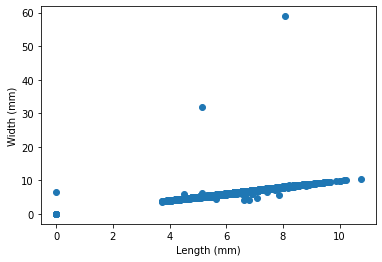

In [62]:
plt.scatter(dataset2.x, dataset2.y)
plt.xlabel('Length (mm)')
plt.ylabel('Width (mm)')
plt.show()

From the Scatterplot it's clear that both are positively co-related.

In [63]:
covariance = np.cov(dataset2.x, dataset2.y)

In [64]:
print(covariance)
print()
print(covariance[0,1])

[[1.25834717 1.24878933]
 [1.24878933 1.30447161]]

1.2487893340607643


Both variable x and y have positive relationship.

In [68]:
def pearson(x,y):
    correlation_matrix = np.corrcoef(x,y)
    return correlation_matrix

In [69]:
CoRelation = pearson(dataset2.x, dataset2.y)

In [70]:
print(CoRelation)

[[1.         0.97470148]
 [0.97470148 1.        ]]


In [71]:
print(CoRelation[0,1])

0.9747014796703485


Both the variables are strongly corelated.